In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
)
from imblearn.over_sampling import SMOTE

# Suppress warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
# Step 2: Load the dataset
file_path = "/content/drive/MyDrive/ai4i2020.csv"
df = pd.read_csv(file_path)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


# Data Cleaning and Preprocessing

In [ ]:
# Drop irrelevant columns
df.drop(columns=['UDI', 'Product ID'], inplace=True)

# Encode 'Type' column
df['Type'] = LabelEncoder().fit_transform(df['Type'])

# Separate features and target
X = df.drop(columns='Machine failure')
y = df['Machine failure']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only on training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)

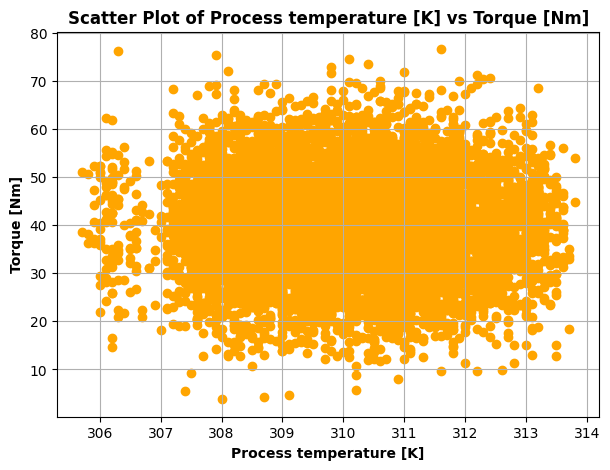

In [ ]:
## Relational Graph
def scatter_plot(df, x_column, y_column):
    """
    Generate a scatter plot of two columns from a DataFrame.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column for the x-axis.
        y_column (str): The name of the column for the y-axis.

    Returns:
        None
    """
    plt.figure(figsize=(7, 5))
    plt.scatter(df[x_column], df[y_column], color='orange')
    plt.xlabel(x_column, fontweight='bold')
    plt.ylabel(y_column, fontweight='bold')
    plt.title(f'Scatter Plot of {x_column} vs {y_column}', fontweight='bold')
    plt.grid(True)
    plt.show()

# Calling the function
scatter_plot(df, 'Process temperature [K]', 'Torque [Nm]')


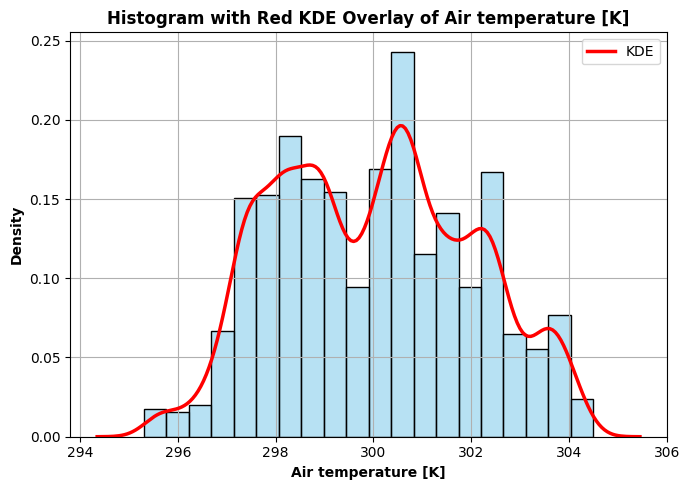

In [ ]:
## Statistical Graph
def histogram_with_kde(df, column):
    """
    Generate a histogram with a red-colored KDE overlay for a selected column.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        column (str): The column name to plot.

    Returns:
        None
    """
    plt.figure(figsize=(7, 5))

    # Plot histogram separately
    sns.histplot(df[column], bins=20, kde=False, color='skyblue', edgecolor='black', stat='density', alpha=0.6)

    # Plot KDE separately in red color
    sns.kdeplot(df[column], color='red', linewidth=2.5, linestyle='-', label='KDE')

    # Titles and labels
    plt.xlabel(column, fontweight='bold')
    plt.ylabel('Density', fontweight='bold')
    plt.title(f'Histogram with Red KDE Overlay of {column}', fontweight='bold')

    # Show legend and grid
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Calling the function
histogram_with_kde(df, 'Air temperature [K]')


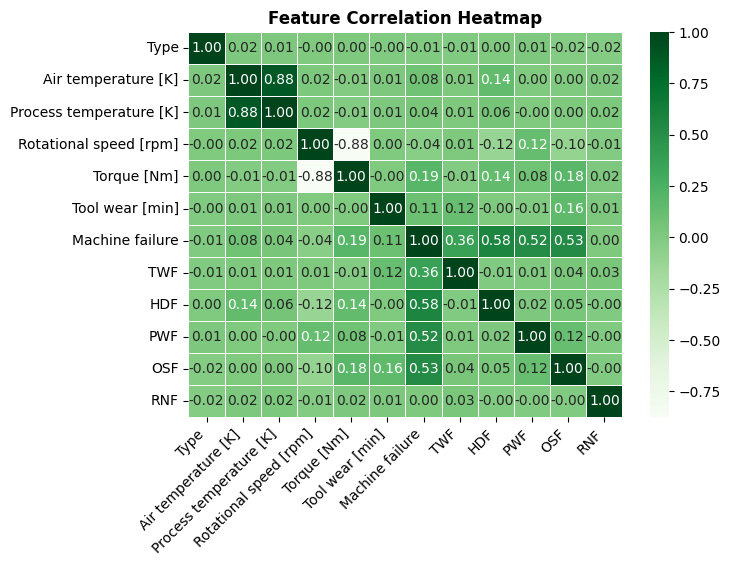

In [ ]:
## Statistical Graph
def correlation_heatmap(df):
    """
    Generate a heatmap to visualize feature correlations.

    Parameters:
        df (DataFrame): The DataFrame containing the features.

    Returns:
        None
    """
    plt.figure(figsize=(7, 5))
    sns.heatmap(df.corr(), annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
    plt.title('Feature Correlation Heatmap', fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Calling the function
correlation_heatmap(df)


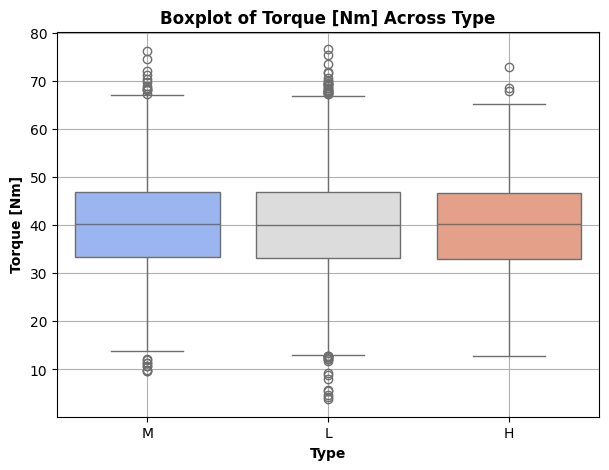

In [ ]:
# Load the original dataset with 'Type' column intact
df_raw = pd.read_csv("/content/drive/MyDrive/ai4i2020.csv")

## Categorical vs Numerical Graph
def plot_boxplot(df, x_column, y_column):
    """
    Generate a boxplot to visualize distribution across different categories.

    Parameters:
        df (DataFrame): The DataFrame containing the data.
        x_column (str): The categorical column for the x-axis.
        y_column (str): The numerical column for the y-axis.

    Returns:
        None
    """
    plt.figure(figsize=(7, 5))
    sns.boxplot(data=df, x=x_column, y=y_column, palette='coolwarm')
    plt.xlabel(x_column, fontweight='bold')
    plt.ylabel(y_column, fontweight='bold')
    plt.title(f'Boxplot of {y_column} Across {x_column}', fontweight='bold')
    plt.grid(True)
    plt.show()

# Make sure to load original df (if needed)
df_raw = pd.read_csv(file_path)

# Calling the function
plot_boxplot(df_raw, 'Type', 'Torque [Nm]')


# Feature Importance

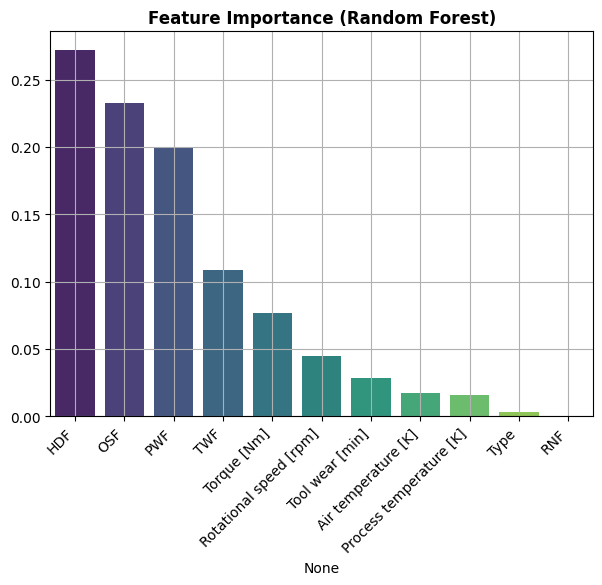

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x=importances.index, y=importances.values, palette='viridis')
plt.title('Feature Importance (Random Forest)', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


# Hyperparameter Tuning

In [ ]:
# Sample for tuning
X_sample_raw, _, y_sample, _ = train_test_split(
    X_train_resampled, y_train_resampled,
    train_size=0.4, stratify=y_train_resampled, random_state=42
)
X_sample = scaler.transform(X_sample_raw)  # Only transform!

# Logistic Regression
logistic_params = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
logistic_random = RandomizedSearchCV(LogisticRegression(max_iter=1000), logistic_params, n_iter=4, cv=3, n_jobs=-1, random_state=42)
logistic_random.fit(X_sample, y_sample)
logistic_model = logistic_random.best_estimator_

# Decision Tree
tree_params = {'max_depth': [5, 10, 20, None], 'min_samples_split': [2, 5, 10]}
tree_random = RandomizedSearchCV(DecisionTreeClassifier(), tree_params, n_iter=5, cv=3, n_jobs=-1, random_state=42)
tree_random.fit(X_sample, y_sample)
tree_model = tree_random.best_estimator_

# Random Forest
rf_params = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, None]}
rf_random = RandomizedSearchCV(RandomForestClassifier(), rf_params, n_iter=5, cv=3, n_jobs=-1, random_state=42)
rf_random.fit(X_sample, y_sample)
rf_model = rf_random.best_estimator_

# SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_random = RandomizedSearchCV(SVC(probability=True), svm_params, n_iter=4, cv=3, n_jobs=-1, random_state=42)
svm_random.fit(X_sample, y_sample)
svm_model = svm_random.best_estimator_
print("Hyperparameter tuning completed for all models.")

Hyperparameter tuning completed for all models.


# Model Training

In [ ]:
# Model Training and Testing

models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': tree_model,
    'Random Forest': rf_model,
    'SVM': svm_model
}

results = {}

for name, model in models.items():
    # Train the model on SMOTE-resampled, scaled training data
    model.fit(X_train_scaled, y_train_resampled)

    # Predict on original scaled test data
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test_scaled)

    # Store predictions
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_prob': y_prob
    }
print("\n All models trained and predictions saved.")


 All models trained and predictions saved.


# Model Evaluation

In [ ]:
# Model Evaluation, Storage, and Printing

for name, data in results.items():
    y_pred = data['y_pred']
    y_prob = data['y_prob']

    # Core metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    readable_report = classification_report(y_test, y_pred)

    # AUC and ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)

    # Store for later use
    results[name]['accuracy'] = acc
    results[name]['confusion_matrix'] = cm
    results[name]['classification_report'] = report
    results[name]['readable_report'] = readable_report
    results[name]['auc_score'] = auc_score
    results[name]['FPR'] = fpr
    results[name]['TPR'] = tpr

    # Nicely formatted output
    print(f"\n{'=' * 60}")
    print(f"{name} - Model Performance Metrics")
    print(f"{'=' * 60}")
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC Score: {auc_score:.4f}\n")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(readable_report)



Logistic Regression - Model Performance Metrics
Accuracy: 0.9570
AUC Score: 0.9872

Confusion Matrix:
[[1848   84]
 [   2   66]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1932
           1       0.44      0.97      0.61        68

    accuracy                           0.96      2000
   macro avg       0.72      0.96      0.79      2000
weighted avg       0.98      0.96      0.96      2000


Decision Tree - Model Performance Metrics
Accuracy: 0.9660
AUC Score: 0.9188

Confusion Matrix:
[[1872   60]
 [   8   60]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1932
           1       0.50      0.88      0.64        68

    accuracy                           0.97      2000
   macro avg       0.75      0.93      0.81      2000
weighted avg       0.98      0.97      0.97      2000


Random Forest - Model Performance Metrics
A

### plotting ROC curves

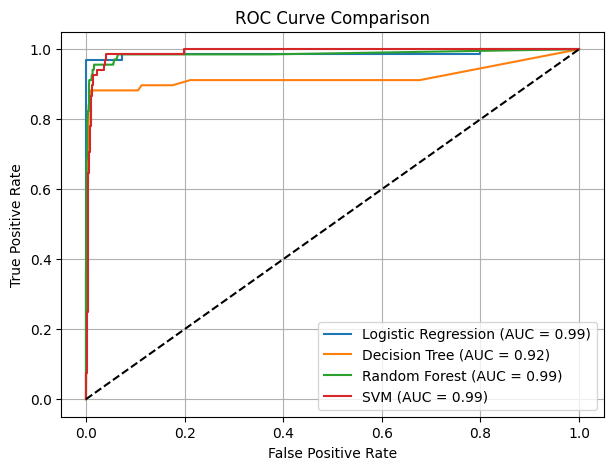

In [ ]:
plt.figure(figsize=(7,5))

for name, data in results.items():
    fpr, tpr, _ = roc_curve(y_test, data['y_prob'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {data["auc_score"]:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()


# Model Comparision Table

In [ ]:
# Create a DataFrame to store metrics
comparison_df = pd.DataFrame({
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [precision_score(y_test, results[m]['y_pred']) for m in results],
    'Recall': [recall_score(y_test, results[m]['y_pred']) for m in results],
    'F1-Score': [f1_score(y_test, results[m]['y_pred']) for m in results],
    'ROC AUC': [results[m]['auc_score'] for m in results]
}, index=results.keys())

# Round to 4 decimal places for neatness
comparison_df = comparison_df.round(4)

# Display the comparison table
print("\n" + "="*70)
print("Final Model Comparison Table")
print("="*70)
display(comparison_df)



Final Model Comparison Table


,Accuracy,Precision,Recall,F1-Score,ROC AUC
Logistic Regression,0.9570,0.4400,0.9706,0.6055,0.9872
Decision Tree,0.9660,0.5000,0.8824,0.6383,0.9188
Random Forest,0.9760,0.5909,0.9559,0.7303,0.9864
SVM,0.9595,0.4552,0.9706,0.6197,0.9903


# Final Model Pridiction


 This project predicts whether a machine is likely to fail based on operational sensor data.


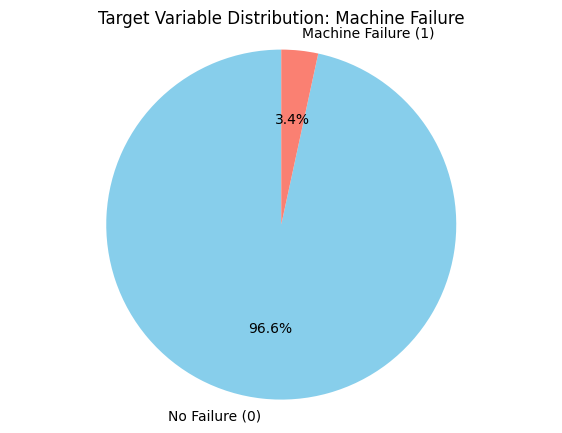

In [ ]:
# What the project predicts
print("\n This project predicts whether a machine is likely to fail based on operational sensor data.")

# Simulated class distribution from your dataset (you can also use: y.value_counts(normalize=True))
class_counts = pd.Series({0: 0.9661, 1: 0.0339})
labels = ["No Failure (0)", "Machine Failure (1)"]

# Plot the class distribution
plt.figure(figsize=(7, 5))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=["skyblue", "salmon"])
plt.title("Target Variable Distribution: Machine Failure")
plt.axis("equal")
plt.show()